In [15]:
import colorsys
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.ndimage as ndimage

In [2]:
# load images in
data_path = '/home/michaelneuder/research/imagequalityanalysis/nature_pics/'

In [3]:
pic_array = [mpimg.imread(os.path.join(data_path, 'file-{}.jpg'.format(ii))) / 255 for ii in range(1,51)]

In [4]:
rows, cols = pic_array[0].shape[:2]

In [5]:
# rgb to hsl
for pic in pic_array:
    for row in range(rows):
        for col in range(cols):
            pic[row,col,:] = colorsys.rgb_to_hls(
                pic[row,col,0],
                pic[row,col,1],
                pic[row,col,2]) 

In [14]:
pic_array[0][:,:,1]

array([[0.91764706, 0.91372549, 0.91372549, ..., 0.51176471, 0.52352941,
        0.51764706],
       [0.92156863, 0.93333333, 0.9254902 , ..., 0.53921569, 0.53137255,
        0.51764706],
       [0.93921569, 0.93137255, 0.89411765, ..., 0.47647059, 0.5       ,
        0.51960784],
       ...,
       [0.37647059, 0.25490196, 0.22941176, ..., 0.10588235, 0.21764706,
        0.06862745],
       [0.40588235, 0.11372549, 0.02941176, ..., 0.09215686, 0.06862745,
        0.02941176],
       [0.05686275, 0.15098039, 0.05686275, ..., 0.02745098, 0.06666667,
        0.04313725]])

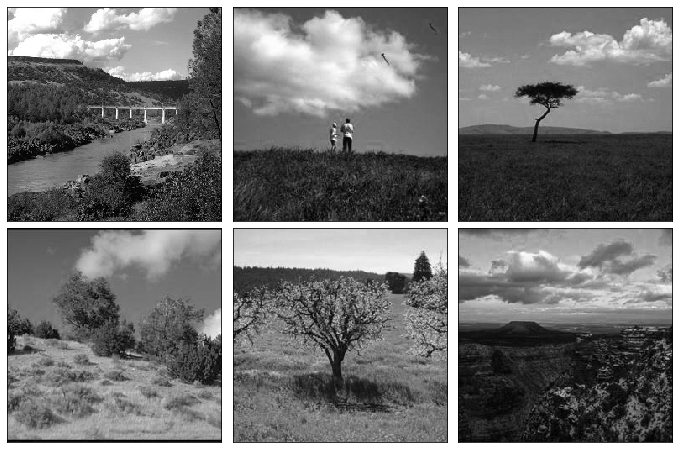

In [13]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

    ax_dict[ii].imshow(pic_array[ii][:,:,1], cmap='gray')
    
# plt.savefig('hsl.png')
plt.show()

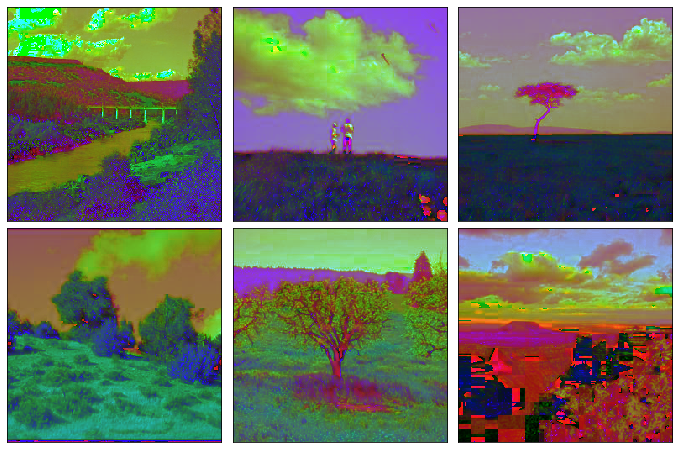

In [65]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

    ax_dict[ii].imshow(pic_array[ii])
    
# plt.savefig('hsl.png')
plt.show()

In [66]:
# z-score lightness dimension -- dimesion 2 (index 1)
alpha = 0.05
for pic in pic_array:
    lightness_scores = pic[:,:,1]
    lightness_mean = lightness_scores.mean()
    lightness_std  = lightness_scores.std()
    for row in range(rows):
        for col in range(cols):
            lightness_scores[row, col] = lightness_mean + alpha*(lightness_scores[row, col] - lightness_mean) / lightness_std
    pic[:,:,1] = lightness_scores          

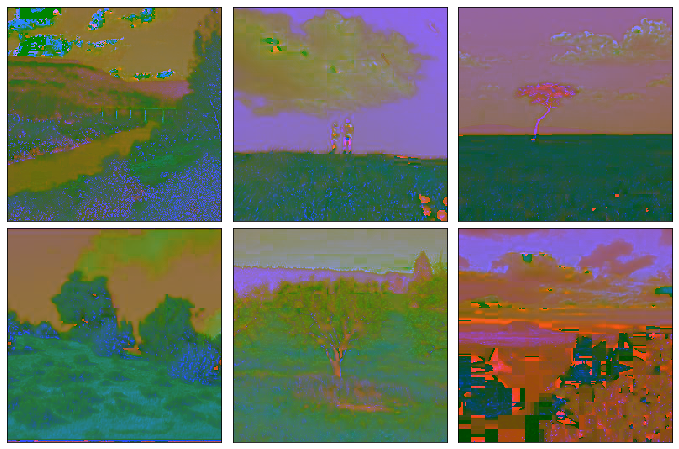

In [67]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

    ax_dict[ii].imshow(pic_array[ii])
    
# plt.savefig('hsl_lightnessnorm25.png')
plt.show()

In [68]:
# hls to rgb
for pic in pic_array:
    for row in range(rows):
        for col in range(cols):
            pic[row,col,:] = colorsys.hls_to_rgb(
                pic[row,col,0],
                pic[row,col,1],
                pic[row,col,2]) 

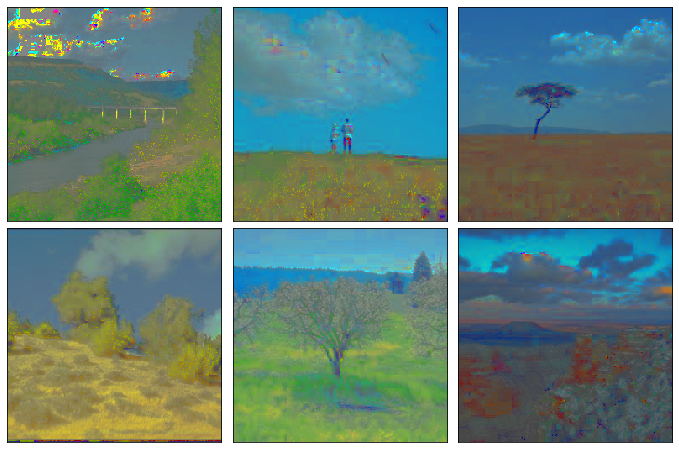

In [70]:
plt.figure(figsize = (12,8))
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.03, hspace=0.03)

ax_dict = {}
for ii in range(6):
    ax_dict[ii] = plt.subplot(gs1[ii])
    ax_dict[ii].set_xticklabels([])
    ax_dict[ii].set_yticklabels([])
    ax_dict[ii].get_xaxis().set_visible(False)
    ax_dict[ii].get_yaxis().set_visible(False)

    ax_dict[ii].imshow(pic_array[ii])
    
plt.savefig('hsl_lightnessnorm25_rgb.png')
plt.show()